# Data Science Principles and Practices (COMM054) Lab Week 5

Follow the instructions to complete each of these tasks. This set of exercises focusses on writing basic Python code to perform estimation using **SciPy**. Do not worry if you do not complete them all in the timetabled lab session.

This is not assessed but will help you gain practical experience for the module exam and coursework.

# Libraries

As in previous weeks, we will be using NumPy, SciPy, and Pyplot from Matplotlib, so import these first:

```python
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
```

In [1]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt

# Estimation of population mean and population variance

Recall the estimators for the population mean and population variance discussed in lectures:

$$
\begin{align*}
\overline{x} &= \frac{1}{n}\sum_{i=1}^n x_i \qquad\qquad\text{sample mean}\\
s^2_\text{biased} &= \frac{1}{n}\sum_{i=1}^n (x_i-\overline{x})^2\qquad\text{biased sample variance}\\
s^2_\text{unbiased} &= \frac{1}{n-1}\sum_{i=1}^n (x_i-\overline{x})^2\qquad\text{unbiased sample variance}
\end{align*}
$$
where $n$ is the sample size. 

Let us first evaluate these by drawing 6 samples from a Poisson distribution (which you will recall has equal mean and variance):

```python
mu, n = 5, 6
x_samples = ss.poisson.rvs(mu, size=n)

mean = np.mean(x_samples)
var_b = np.var(x_samples)
var_ub = np.var(x_samples, ddof=1)
print("The true values of the mean and variance are", mu, "and", mu, "respectively")
print("The samples are", x_samples)
print("The sample mean is", mean)
print("The biased sample variance is", var_b)
print("The unbiased sample variance is", var_ub)
```

In [2]:
mu, n = 5, 6
x_samples = ss.poisson.rvs(mu, size=n)

mean = np.mean(x_samples)
var_b = np.var(x_samples)
var_ub = np.var(x_samples, ddof=1)
print("The true values of the mean and variance are", mu, "and", mu, "respectively")
print("The samples are", x_samples)
print("The sample mean is", mean)
print("The biased sample variance is", var_b)
print("The unbiased sample variance is", var_ub)

The true values of the mean and variance are 5 and 5 respectively
The samples are [3 5 3 7 2 4]
The sample mean is 4.0
The biased sample variance is 2.6666666666666665
The unbiased sample variance is 3.2


Unbiased estimators have the property that their expectation equals the true value of the parameter. This means that if we consider a large number of experiments (in each case, taking a fixed number of samples $n$, and calculating the estimator on these samples), then the average of the estimates will tend to the true value of the parameter as the number of experiments increases. 

Let's see this in action for our case: we consider running 10000 experiments, where in each case we sample 6 values from the Poisson distribution. We calculate the sample mean, biased sample variance, and unbiased sample variance in each case, and average over the number of experiments:

```python
mu, n = 5, 6
num_experiments = 10000

mean_average, var_b_average, var_ub_average = 0, 0, 0

for i in range(num_experiments):
    x_samples = ss.poisson.rvs(mu, size=n)
    mean_average += np.mean(x_samples)             # sum all the sample means
    var_b_average += np.var(x_samples)             # sum all the biased sample variances
    var_ub_average += np.var(x_samples, ddof=1)    # sum all the unbiased sample variances

mean_average /= num_experiments   # average over all experiments
var_b_average /= num_experiments
var_ub_average /= num_experiments

print("The true values of the mean and variance are", mu, "and", mu, "respectively")
print("The average of the sample mean over " + str(num_experiments) + " experiments is", mean_average)
print("The average of the biased sample variance over " + str(num_experiments) + " experiments is", var_b_average)
print("The average of the unbiased sample variance over " + str(num_experiments) + " experiments is", var_ub_average)
```

In [3]:
mu, n = 5, 6
num_experiments = 10000

mean_average, var_b_average, var_ub_average = 0, 0, 0

for i in range(num_experiments):
    x_samples = ss.poisson.rvs(mu, size=n)
    mean_average += np.mean(x_samples)             # sum all the sample means
    var_b_average += np.var(x_samples)             # sum all the biased sample variances
    var_ub_average += np.var(x_samples, ddof=1)    # sum all the unbiased sample variances

mean_average /= num_experiments   # average over all experiments
var_b_average /= num_experiments
var_ub_average /= num_experiments

print("The true values of the mean and variance are", mu, "and", mu, "respectively")
print("The average of the sample mean over " + str(num_experiments) + " experiments is", mean_average)
print("The average of the biased sample variance over " + str(num_experiments) + " experiments is", var_b_average)
print("The average of the unbiased sample variance over " + str(num_experiments) + " experiments is", var_ub_average)

The true values of the mean and variance are 5 and 5 respectively
The average of the sample mean over 10000 experiments is 5.004883333333351
The average of the biased sample variance over 10000 experiments is 4.16507499999999
The average of the unbiased sample variance over 10000 experiments is 4.998090000000069


You should see that the averages of the sample mean and unbiased sample variance closely agree with the true values of the mean and variance of the underlying distribution, while the average of the biased sample variance underestimates the true value of the variance (by a factor of approximately $\frac{n-1}{n}$).

Try playing around with some of the parameters in the program above to see what effect it has. Note that for a large number of samples $n$, the difference between the unbiased and biased sample variance becomes small (since $\frac{n-1}{n}\simeq 1$ for large $n$).

Repeat this example for a normal distribution with mean 5 and standard deviation 3:

In [7]:
mu,n,sd = 5, 6, 3
num_experiments = 10000

mean_average, var_b_average, var_ub_average = 0, 0, 0

for i in range(num_experiments):
    x_samples = ss.norm.rvs(mu,sd, size=n)
    mean_average += np.mean(x_samples)             # sum all the sample means
    var_b_average += np.var(x_samples)             # sum all the biased sample variances
    var_ub_average += np.var(x_samples, ddof=1)    # sum all the unbiased sample variances

mean_average /= num_experiments   # average over all experiments
var_b_average /= num_experiments
var_ub_average /= num_experiments

print("The true values of the mean and variance are", mu, "and", sd, "respectively")
print("The average of the sample mean over " + str(num_experiments) + " experiments is", mean_average)
print("The average of the biased sample variance over " + str(num_experiments) + " experiments is", var_b_average)
print("The average of the unbiased sample variance over " + str(num_experiments) + " experiments is", var_ub_average)

The true values of the mean and variance are 5 and 3 respectively
The average of the sample mean over 10000 experiments is 4.98083231264163
The average of the biased sample variance over 10000 experiments is 7.474688459208042
The average of the unbiased sample variance over 10000 experiments is 8.96962615104962


# Confidence intervals

## Normal distribution with unknown $\mu$, known $\sigma$

Suppose we sample a random variable $X\sim N(\mu,\sigma^2)$ that is distributed normally with mean $\mu$ and standard deviation $\sigma$, and obtain the sample $x_1, x_2,\ldots, x_n$. In lectures we showed that the (two-sided) confidence interval associated with this sample is 
$$
\left(\overline{x} - k\frac{\sigma}{\sqrt{n}},\ \overline{x}+k\frac{\sigma}{\sqrt{n}}\right)
$$
where $k$ takes on various values depending on the confidence percentage we are considering. Note that the endpoints of the CI are statistics, since we are assuming that $\sigma$ is **known**.
Some commonly considered values are

| CI% | $k$ |
|:---:|:---:|
| 90 | 1.645 |
| 95 | 1.96 |
| 98 | 2.326 |
| 99 | 2.576 |

(The general formula for $k$ for a given confidence percentage $C$ is
$
k = G\left(\frac{1}{2}\left(1+\frac{C}{100}\right)\right)
$,
where $G$ is the so-called *percent-point function* corresponding to the normal distribution. The percent-point function $G(\alpha)$ gives the value such that $P(Z<G(\alpha)) = \alpha$, where $Z\sim N(0,1)$. The percent-point function is implemented as `scipy.stats.norm.ppf` in SciPy.)

The code below samples a random variable $X\sim N(5, 3^2)$ 1000 times, and calculates the corresponding 95% confidence interval:

```python
mu, sigma, n = 5, 3, 1000
confidence_percentage = 95
k = ss.norm.ppf(1/2*(1+confidence_percentage/100))

x_samples = ss.norm.rvs(loc = mu, scale = sigma, size=n)

x_bar = np.mean(x_samples)
lower_bound, upper_bound = x_bar-k*sigma/np.sqrt(n), x_bar+k*sigma/np.sqrt(n)

print("The "+ str(confidence_percentage) + "% confidence interval for the sample is "+"(" + str(lower_bound) + "," + str(upper_bound) + ")")
```
Try this below:

In [8]:
mu, sigma, n = 5, 3, 1000
confidence_percentage = 95
k = ss.norm.ppf(1/2*(1+confidence_percentage/100))

x_samples = ss.norm.rvs(loc = mu, scale = sigma, size=n)

x_bar = np.mean(x_samples)
lower_bound, upper_bound = x_bar-k*sigma/np.sqrt(n), x_bar+k*sigma/np.sqrt(n)

print("The "+ str(confidence_percentage) + "% confidence interval for the sample is "+"(" + str(lower_bound) + "," + str(upper_bound) + ")")

The 95% confidence interval for the sample is (4.8188568142231185,5.190733833605855)


The confidence interval can also be calculated using the `interval()` method, which calculates the interval that contains 95% of the probability of a distribution. Since for the sample mean 
$$\overline{X}\sim N\left(\mu,\frac{\sigma^2}{n}\right),$$
we calculate the 95% confidence interval using:
```python
ss.norm.interval(0.95,np.mean(x_samples),sigma/np.sqrt(n))
```
Try this:

In [9]:
ss.norm.interval(0.95,x_bar,sigma/np.sqrt(n))

(4.8188568142231185, 5.190733833605855)

The interpretation of the 95% confidence interval is as follows: suppose we conduct a number of "experiments", where each experiment consists of sampling $n$ times from $X$, and calculating the corresponding confidence interval. Then for a large number of experiments, the true value of the (unknown to us) mean $\mu$ will lie within the confidence interval 95% of the time. Let's test this with the following code:
```python
mu, sigma, n = 5, 3, 1000  # n = number of samples taken in each experiment
confidence_percentage = 95  # 95% confidence interval
k = ss.norm.ppf(1/2*(1+confidence_percentage/100))

num_experiments = 100  
num_containing_mu = 0        # records the number of times our confidence interval contains the true value of the mean

for i in range(num_experiments):
    x_samples = ss.norm.rvs(loc=mu, scale=sigma, size=n)
    x_bar = np.mean(x_samples)
    lower_bound, upper_bound = x_bar-k*sigma/np.sqrt(n), x_bar+k*sigma/np.sqrt(n) # calculating the confidence interval
    if (mu >= lower_bound) and (mu <= upper_bound):
        num_containing_mu += 1       # if mu lies in the confidence interval, increment num_containing_mu by 1

print("The fraction of experiments where the confidence interval contains the true value of mu is", num_containing_mu/num_experiments)
```
Try this below. Experiment with adjusting `num_experiments`: as it gets larger, the fraction of times the CI contains $\mu$ should get closer to 95%. Also experiment with other values of `confidence_percentage`.

In [10]:
mu, sigma, n = 5, 3, 1000  # n = number of samples taken in each experiment
confidence_percentage = 95  # 95% confidence interval
k = ss.norm.ppf(1/2*(1+confidence_percentage/100))

num_experiments = 100  
num_containing_mu = 0        # records the number of times our confidence interval contains the true value of the mean

for i in range(num_experiments):
    x_samples = ss.norm.rvs(loc=mu, scale=sigma, size=n)
    x_bar = np.mean(x_samples)
    lower_bound, upper_bound = x_bar-k*sigma/np.sqrt(n), x_bar+k*sigma/np.sqrt(n) # calculating the confidence interval
    if (mu >= lower_bound) and (mu <= upper_bound):
        num_containing_mu += 1       # if mu lies in the confidence interval, increment num_containing_mu by 1

print("The fraction of experiments where the confidence interval contains the true value of mu is", num_containing_mu/num_experiments)

The fraction of experiments where the confidence interval contains the true value of mu is 0.97


## Normal distribution with unknown $\mu$ and $\sigma$, large sample size

Suppose instead that both $\mu$ and $\sigma$ are unknown. If the sample is large (above 30 at least), then we can approximate the confidence interval by
$$
\left(\overline{x} - k\frac{s}{\sqrt{n}},\ \overline{x}+k\frac{s}{\sqrt{n}}\right)
$$
where $s$ is the *unbiased* sample standard deviation
$$
s = \sqrt{\frac{1}{n-1}\sum_{i=1}^n (x_i-\overline{x})^2}
$$
Using this result, sample from $X\sim N(3,5^2)$ 1000 times to generate data, and then estimate the 95% confidence interval, assuming that both $\mu=3$ and $\sigma=5$ are **unknown**.

In [120]:
mu, sigma, n= 5, 3, 1000

rv= ss.norm.rvs(loc=mu, scale= sigma, size=n)
rvsqrd= 0;
xbarnsquard=0;

k = ss.norm.ppf(1/2*(1+confidence_percentage/100))


x_bar = np.mean(rv)
xbarnsquard=n*(np.square(x_bar))
ubSig =  np.std(rv, ddof=1)
ubSig

lower_bound, upper_bound=x_bar-k*ubSig/np.sqrt(n),x_bar+k*ubSig/np.sqrt(n)

print(lower_bound, upper_bound)

4.821018143691968 5.196164766162274


Modify the previous code to calculate the fraction of experiments where the confidence interval contains the true value of $\mu$, assuming that both $\mu$ and $\sigma$ are unknown.

Once you have done this, adjust the number of samples taken each experiment, exploring values that are lower than 30. You should notice that the calculated fraction deviates significantly from the target value of 0.95.

In [141]:
mu, sigma, n = 5, 3, 10  # n = number of samples taken in each experiment
confidence_percentage = 95  # 95% confidence interval
k = ss.t.ppf(1/2*(1+confidence_percentage/100), n-1)

num_experiments = 100
num_containing_mu = 0        # records the number of times our confidence interval contains the true value of the mean

for i in range(num_experiments):
    x_samples = ss.norm.rvs(loc=mu, scale=sigma, size=n)
    x_bar = np.mean(x_samples)
    lower_bound, upper_bound = x_bar-k*sigma/np.sqrt(n), x_bar+k*sigma/np.sqrt(n) # calculating the confidence interval
    if (mu >= lower_bound) and (mu <= upper_bound):
        num_containing_mu += 1       # if mu lies in the confidence interval, increment num_containing_mu by 1

print("The fraction of experiments where the confidence interval contains the true value of mu is", num_containing_mu/num_experiments)

The fraction of experiments where the confidence interval contains the true value of mu is 0.94


## Normal distribution with unknown $\mu$ and $\sigma$, small sample size

For sample sizes $n<30$, the approximation to the confidence interval described above becomes less accurate. Instead of using the normal distribution to calculate $k$, we instead must use Student's t-distribution with $n-1$ degrees of freedom. This is calculated in `scipy.stats` using the command

```python
confidence_percentage = 95
k = ss.t.ppf(1/2*(1+confidence_percentage/100), n-1)
```

"Student" is a pseudonym for Irish statistician William Sealy Gosset, who derived his distribution in 1908 while working in quality control at the Guinness brewery in Dublin: https://en.wikipedia.org/wiki/Student%27s_t-distribution

Using this value for $k$, repeat the fraction calculation above for small samples ($n=10$, say). You should notice a closer agreement to target fraction of 0.95.

# Maximum likelihood estimators (MLEs)

## Normal distribution with unknown $\mu$, known $\sigma$ 

**scipy.stats** has a built-n `fit()` method that can calculate maximum likelihood estimates for its various distributions. We use it as follows:

```python
mu_true, sigma_true = 5, 2
x_samples = ss.norm.rvs(loc=mu_true, scale=sigma_true, size=1000)  # take 1000 samples

mu_MLE = ss.norm.fit(x_samples, fscale=sigma_true)[0]
print("The maximum likelihood estimate of the mean is", mu_MLE)

```

The `.fit()` method returns a list containing the MLE estimates for the given sample. In this example, we imagine we know the standard deviation $\sigma$, and are just interested in estimating the mean $\mu$. The optional argument `fscale=sigma_true` tells SciPy to fix the `scale` argument in the distribution (which corresponds to the standard deviation), so that maximises on the `loc` argument only (which corresponds to the mean).

Try this below:

In [142]:
mu_true, sigma_true = 5, 2
x_samples = ss.norm.rvs(loc=mu_true, scale=sigma_true, size=1000)  # take 1000 samples

mu_MLE = ss.norm.fit(x_samples, fscale=sigma_true)[0]
print("The maximum likelihood estimate of the mean is", mu_MLE)

The maximum likelihood estimate of the mean is 4.945510493430081


We can compare this to the theoretical MLE estimator derived in the lectures (which turned out to just be the sample mean):
$$
\mu_\text{MLE}(x_1,\ldots,x_n) = \frac{1}{n}\sum_{i=1}x_i
$$
Calculate this value below:

In [143]:
np.mean(x_samples)

4.945510493430081

You should see that the two values agree. Let's plot the histogram of the samples we drew, alongside the normal distribution with the given (known) standard deviation, and the MLE estimate for the mean:
```python
fig, ax = plt.subplots(nrows = 1, ncols=2)

ax[0].hist(x_samples, bins=50)
ax[0].set_title("histogram of samples")

x_range = np.linspace(min(x_samples),max(x_samples),100)
ax[1].plot(x_range, ss.norm.pdf(x_range, loc=mu_MLE, scale=sigma_true))
ax[1].set_title("pdf using mu_MLE")
ax[1].set_ylim(bottom=0)

plt.tight_layout()
plt.show()
```

The expression `np.linspace(min, max, num)` returns a list of `num` values starting from `min` and ending with `max`.

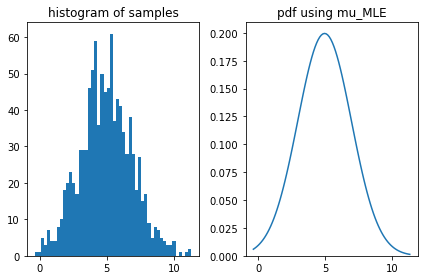

In [144]:
fig, ax = plt.subplots(nrows = 1, ncols=2)

ax[0].hist(x_samples, bins=50)
ax[0].set_title("histogram of samples")

x_range = np.linspace(min(x_samples),max(x_samples),100)
ax[1].plot(x_range, ss.norm.pdf(x_range, loc=mu_MLE, scale=sigma_true))
ax[1].set_title("pdf using mu_MLE")
ax[1].set_ylim(bottom=0)

plt.tight_layout()
plt.show()

Using the `fit()` method works well since we are drawing from a known distribution. But let us suppose we did not know the theoretical expression for the MLE estimator (this might be the case, for example, if we were using our own custom probability distribution to model a problem). We would need to resort to numerically maximizing the likelihood function, or more simply, the log-likelihood. Recall the expression for this:
$$
\log L(\lambda_1,\ldots,\lambda_l) = \sum_{i=1}^n \log f(x_i;\lambda_1,\ldots,\lambda_l)
$$
where $x_1,\ldots, x_n$ is the sample, and $\lambda_1,\ldots,\lambda_l$ are the parameters our distribution function $f$. In the case of the normal distribution
$$
f(x;\mu,\sigma) = \frac{1}{\sqrt{2\pi}\sigma}\exp\left( -\frac{(x-\mu)^2}{2\sigma^2} \right)
$$
Since we are initially assuming $\sigma$ is known, we just consider the function 
$$
\log L(\mu) = \sum_{i=1}^n \log f(x_i;\mu,\sigma).
$$

We draw 1000 samples, and plot the log-likelihood using the following code:
```python
def loglikelihood(mu):
    value = 0
    for x in x_samples:
        value += np.log(ss.norm.pdf(x, loc=mu, scale=sigma_true))
    return value

mu_range = np.linspace(0,10,100)
plt.plot(mu_range, loglikelihood(mu_range))
plt.title("Plot of log-likelihood function")
plt.xlabel("mu")
plt.show()
```

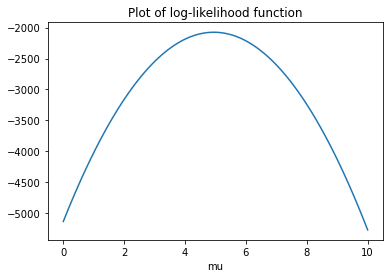

In [147]:
def loglikelihood(mu):
    value = 0
    for x in x_samples:
        value += np.log(ss.norm.pdf(x, loc=mu, scale=sigma_true))
    return value

mu_range = np.linspace(0,10,100)
plt.plot(mu_range, loglikelihood(mu_range))
plt.title("Plot of log-likelihood function")
plt.xlabel("mu")
plt.show()



Our goal is to find the value of $\mu$ that maximises the log-likelihood function. We can do this by using the `minimize` function from `scipy.optimize`. Maximizing $L(\mu)$ is equivalent to minimizing $-L(\mu)$, so we need to define the auxilliary function `minusloglikelihood`. Also, the minimize function requires an initial guess, which we can estimate from the plot above - we take 7 as our initial guess in the code below:

```python
import scipy.optimize as so

def minusloglikelihood(mu):
    return (-1)*loglikelihood(mu)

minimization_result = so.minimize(minusloglikelihood, 7)  # minimize with an initial guess of mu=7
print(minimization_result)
```

In [149]:
import scipy.optimize as so

def minusloglikelihood(mu):
    return (-1)*loglikelihood(mu)

minimization_result = so.minimize(minusloglikelihood, 7)  # minimize with an initial guess of mu=7
print(minimization_result)

      fun: 2522.295494426391
 hess_inv: array([[0.00969226]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 30
      nit: 4
     njev: 15
   status: 0
  success: True
        x: array([5.04491131])


`minimization_result` contains a collection of useful information related to the minimization. The value of $\mu$ that actually minimizes $-\log L(\mu)$ is stored in `minimization_result.x` as a numpy array. From this, you can extract the MLE estimate for $\mu$:
```python
mu_MLE = minimization_result.x[0]
```
As above, try plotting the histogram of samples against the pdf generated using $\mu_\text{MLE}$ (and the true value of $\sigma$):

In [151]:
mu_MLE = minimization_result.x[0]

mu_MLE

5.044911307196644

## Normal distribution with unknown $\sigma$, known $\mu$

We can repeat this procedure in the case that $\mu$ is known, but $\sigma$ is unknown. Firstly, using the `fit()` method, and comparing with the theoretical MLE estimator:
$$
\sigma_\text{MLE} = \sqrt{\frac{1}{n}\sum_{i=1}^n (x_i-\mu)^2}
$$

In [152]:
mu_true, sigma_true = 5, 3
x_samples = ss.norm.rvs(loc=mu_true, scale=sigma_true, size=1000)

mu_MLE, sigma_MLE = ss.norm.fit(x_samples)
print("The maximum likelihood estimate of the mean is ", mu_MLE)
print("The maximum likelihood estimate of the standard deviation is ", sigma_MLE)

The maximum likelihood estimate of the mean is  4.9103376258624705
The maximum likelihood estimate of the standard deviation is  2.9968381353523683


Again, we would like to do this using `minimize`. In this case, the log likehood function is
$$
\log L(\sigma) = \sum_{i=1}^n \log f(x_i;\mu,\sigma)
$$
where now $\mu$ is known. First, plot the log-likehood function below (over a suitable range of values for $\sigma$, e.g. 1 to 5):

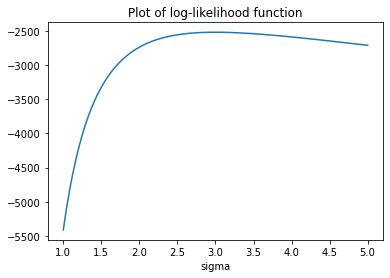

In [158]:
def loglikelihood(sigma):
    value = 0
    for x in x_samples:
        value += np.log(ss.norm.pdf(x, loc=mu_true, scale=sigma))
    return value

sigma_range = np.linspace(1,5,100)
plt.plot(sigma_range, loglikelihood(sigma_range))
plt.title("Plot of log-likelihood function")
plt.xlabel("sigma")
plt.show()    

Next, use `scipy.optimize.minimize` to find the value of $\sigma$ that maximizes the log-likelihood function, choosing an initial guess by referring to your plot above. 

**Note:** if the output of the minimize function contains the message `Desired error not necessarily achieved due to precision loss.`, it may be because your initial guess was not close enough (although you will often get a good result for the maximum point regardless).

In [161]:
def minimizeloglikelihood(sigma):
    return (-1)*loglikelihood(sigma)

minimize= so.minimize(minimizeloglikelihood, 7)

print()

      fun: 2516.9436840077183
 hess_inv: array([[0.00021136]])
      jac: array([-9.15527344e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 76
      nit: 7
     njev: 36
   status: 2
  success: False
        x: array([2.99817976])

Plot the histogram of samples and the pdf generated using $\sigma_\text{MLE}$ (and the true value of $\mu$) below:

## Normal distribution with unknown $\mu$ and $\sigma$

Finally, let us consider the case where we do not know either $\mu$ or $\sigma$. Again, we can use the `fit()` method to estimate both parameters:

```python
mu_true, sigma_true = 5, 3
x_samples = ss.norm.rvs(loc=mu_true, scale=sigma_true, size=1000)

mu_MLE, sigma_MLE = ss.norm.fit(x_samples)
print("The maximum likelihood estimate of the mean is ", mu_MLE)
print("The maximum likelihood estimate of the standard deviation is ", sigma_MLE)
```

In [148]:
mu_true, sigma_true = 5, 3
x_samples = ss.norm.rvs(loc=mu_true, scale=sigma_true, size=1000)

mu_MLE, sigma_MLE = ss.norm.fit(x_samples)
print("The maximum likelihood estimate of the mean is ", mu_MLE)
print("The maximum likelihood estimate of the standard deviation is ", sigma_MLE)

The maximum likelihood estimate of the mean is  5.0449100537510985
The maximum likelihood estimate of the standard deviation is  3.0142004090576577


Compare this against the MLE estimators derived in lectures:
$$
\begin{align*}
\mu_\text{MLE}(x_1,\ldots, x_n) &= \frac{1}{n}\sum_{i=1}^n x_1 \qquad\qquad\qquad \text{the sample mean}\\
\sigma_\text{MLE}(x_1,\ldots,x_n) &= \sqrt{\frac{1}{n}\sum_{i=1}^n (x_i-\mu_\text{MLE})^2} \qquad \text{the biased sample standard deviation}
\end{align*}
$$

In order this case, the log-likelihood function is a function $\log L(\mu,\sigma)$ of two variables. In order to visualize it, we use the `surface_plotting` function of `matplotlib.pyplot`:
```python
def loglikelihood(params):
    value = 0
    for x in x_samples:
        value += np.log(ss.norm.pdf(x, loc=params[0], scale=params[1]))
    return value

mu_range = np.linspace(2,10,20)
sigma_range = np.linspace(1,5,20)

# this takes mu_range and sigma_range, and produces a grid of points suitable for 3d plotting 
muv, sigmav = np.meshgrid(mu_range, sigma_range)  

# values of the log-likelihood function over all points (mu, sigma) in the grid
ll_values = loglikelihood([muv, sigmav])  

ax = plt.axes(projection = '3d')
ax.plot_surface(muv, sigmav, ll_values, cmap='plasma')  # cmap is the colormap, which associates a colour with a height
ax.set_xlabel('mu')
ax.set_ylabel('lambda')
ax.set_zlabel('log-likelihood')

plt.show()
```
Try this below:

Minimizing the log-likehood function works identically to before, except now you must pass a list of initial guesses (of the form `[mu_guess, sigma_guess]`):

Plot the histogram of samples, and the pdf generated using $\mu_\text{MLE}$ and $\sigma_\text{MLE}$:

## Exponential distribution with unknown $\beta$

Repeat the above analysis for the exponential distribution

$$
f(x;\beta) = \beta e^{-\beta x}
$$

In the Week 5 Tutorial Questions, you will show that the theoretical MLE estimator for $\beta$ is

$$
\beta_\text{MLE}(x_1,\ldots, x_n) = \frac{n}{\sum_{i=1}^n x_i} = \frac{1}{\bar{x}}
$$

The exponential distribution in `scipy.stats` is `expon`, and has two arguments `loc` and `scale`. The form of the exponential distribution above corresponds to choosing `loc=0` and `scale = 1/beta`.